In [1]:
import pertpy as pt
import scanpy as sc
import numpy as np

import random
import torch
import sklearn
import os
def set_seed(seed: int):
    # Set Python random seed
    random.seed(seed)

    # Set NumPy random seed
    np.random.seed(seed)

    # Set PyTorch random seed
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)  # If using multi-GPU.

        # Ensure deterministic behavior in PyTorch (can slow down computations)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

    # Set sklearn random seed
    sklearn.utils.check_random_state(seed)

    # Set environment variable for reproducibility
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(123)

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

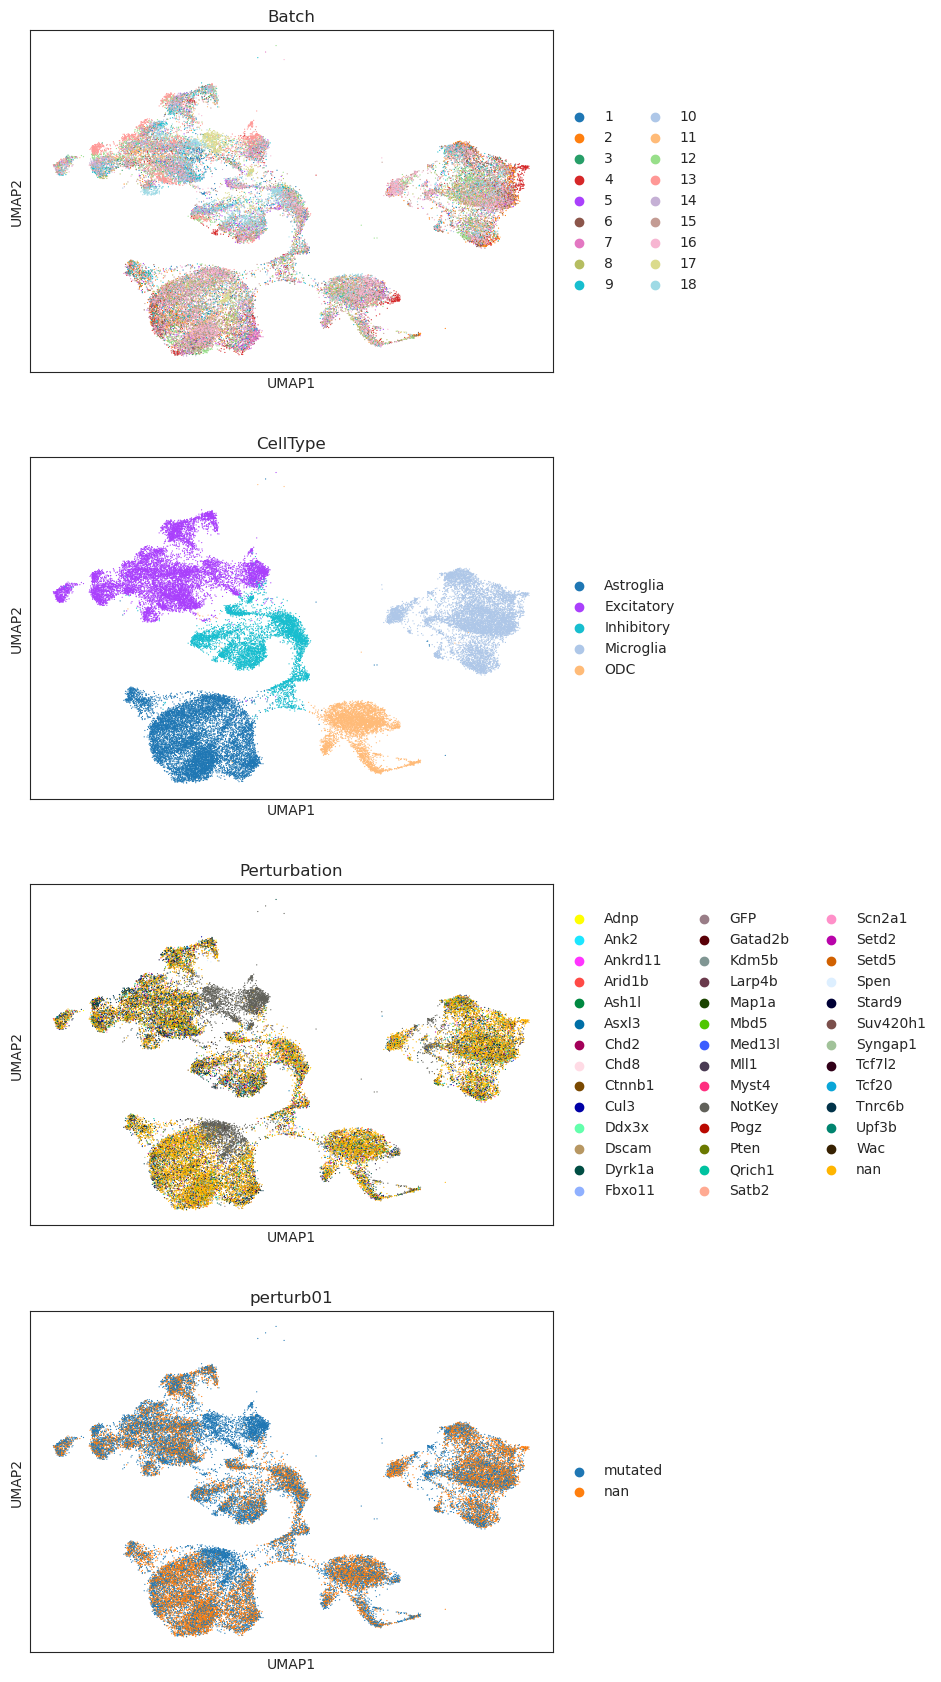

  (5, 3)	7.2946487766577
  (8, 5)	5.09259798962601
  (9, 5)	5.73818938367529
AnnData object with n_obs × n_vars = 40603 × 2000
    obs: 'nGene', 'nUMI', 'Cluster', 'Batch', 'CellType', 'Perturbation', 'isKey', 'isAnalysed', 'SCRUBLET', 'perturb01'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Batch_colors', 'CellType_colors', 'Perturbation_colors', 'hvg', 'neighbors', 'pca', 'perturb01_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [2]:
adata=sc.read_h5ad("../data/ASD1.h5ad")
adata.raw=None
sc.pl.umap(adata,color=["Batch","CellType","Perturbation","perturb01"],ncols=1)
print(adata.X[:10,:10])
print(adata)

In [3]:
from ndreamer import NDreamer
print(adata.shape)
model = NDreamer(adata, condition_key='Perturbation', contorl_name='nan', num_hvg=2000, require_batch=True,
                            batch_key='Batch',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=5, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ASD1/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ASD1/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

try:
    model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
    model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
except Exception as error:
    # handle the exception
    print("An exception occurred:", error) 

(40603, 2000)
Using device: <class 'torch.cuda.device'>
1
Start data preprocessing
Original adata.obs[Batch] back up to adata.obs['batch_backup']
Original adata.obs[Perturbation] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'nan': 0, 'Med13l': 1, 'Tnrc6b': 2, 'NotKey': 3, 'Stard9': 4, 'Asxl3': 5, 'Mbd5': 6, 'Wac': 7, 'Larp4b': 8, 'Setd5': 9, 'Spen': 10, 'Scn2a1': 11, 'Kdm5b': 12, 'Setd2': 13, 'Ankrd11': 14, 'Myst4': 15, 'Fbxo11': 16, 'Ctnnb1': 17, 'Gatad2b': 18, 'Pogz': 19, 'Upf3b': 20, 'Ddx3x': 21, 'Cul3': 22, 'Syngap1': 23, 'Ash1l': 24, 'Tcf20': 25, 'Ank2': 26, 'GFP': 27, 'Qrich1': 28, 'Arid1b': 29, 'Tcf7l2': 30, 'Dscam': 31, 'Mll1': 32, 'Dyrk1a': 33, 'Chd8': 34, 'Map1a': 35, 'Adnp': 36, 'Pten': 37, 'Chd2': 38, 'Suv420h1': 39, 'Satb2': 40}
Condition mapping to adata.obs['batch']: {'Batch': {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18

Overall Progress:   0%|          | 0/5 [00:00<?, ?it/s]

Resetting 776 unused embeddings.
Resetting 793 unused embeddings.
Resetting 784 unused embeddings.
Resetting 764 unused embeddings.
Resetting 817 unused embeddings.
Resetting 786 unused embeddings.
Resetting 809 unused embeddings.
Resetting 811 unused embeddings.
Resetting 817 unused embeddings.
Resetting 793 unused embeddings.
Resetting 798 unused embeddings.
Resetting 789 unused embeddings.
Resetting 780 unused embeddings.
Resetting 735 unused embeddings.
Resetting 779 unused embeddings.
Resetting 794 unused embeddings.
Resetting 786 unused embeddings.
Resetting 814 unused embeddings.
Resetting 806 unused embeddings.
Resetting 784 unused embeddings.
Resetting 799 unused embeddings.
Resetting 803 unused embeddings.
Resetting 787 unused embeddings.
Resetting 785 unused embeddings.
Resetting 772 unused embeddings.
Resetting 774 unused embeddings.
Resetting 798 unused embeddings.
Resetting 814 unused embeddings.
Resetting 811 unused embeddings.
Resetting 794 unused embeddings.
Resetting 

In [4]:
model = NDreamer(adata, condition_key='perturb01', contorl_name='nan', num_hvg=2000, require_batch=True,
                            batch_key='Batch',
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=5, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ASD101/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ASD101/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

try:
    model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
    model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
except Exception as error:
    # handle the exception
    print("An exception occurred:", error) 

Using device: <class 'torch.cuda.device'>
1
Start data preprocessing
Original adata.obs[Batch] back up to adata.obs['batch_backup']
Original adata.obs[perturb01] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'nan': 0, 'mutated': 1}
Condition mapping to adata.obs['batch']: {'Batch': {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17}}
Unique batch mapping: {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9, '11': 10, '12': 11, '13': 12, '14': 13, '15': 14, '16': 15, '17': 16, '18': 17}
Calculating the clusters
Unique groups: ['0_mutated' '0_nan' '10_mutated' '10_nan' '11_mutated' '11_nan'
 '12_mutated' '12_nan' '13_mutated' '13_nan' '14_mutated' '14_nan'
 '15_mutated' '15_nan' '16_mutated' '17_mutated' '17_nan' '1_mutated'
 '1_nan' '2_mutated' '2_nan' '3_mutated' '3_nan' '4_mutated' '4_nan'
 '5_mutated' '5_na

Overall Progress:   0%|          | 0/17 [00:00<?, ?it/s]

Resetting 785 unused embeddings.
Resetting 791 unused embeddings.
Resetting 756 unused embeddings.
Resetting 799 unused embeddings.
Resetting 824 unused embeddings.
Resetting 798 unused embeddings.
Resetting 769 unused embeddings.
Resetting 833 unused embeddings.
Resetting 794 unused embeddings.
Resetting 787 unused embeddings.
Resetting 763 unused embeddings.
Resetting 793 unused embeddings.
Resetting 781 unused embeddings.
Resetting 824 unused embeddings.
Resetting 794 unused embeddings.
Resetting 808 unused embeddings.
Resetting 777 unused embeddings.
Resetting 777 unused embeddings.
Resetting 765 unused embeddings.
Resetting 804 unused embeddings.
Resetting 775 unused embeddings.
Resetting 784 unused embeddings.
Resetting 756 unused embeddings.
Resetting 777 unused embeddings.
Resetting 813 unused embeddings.
Resetting 788 unused embeddings.
Resetting 794 unused embeddings.
Resetting 793 unused embeddings.
Resetting 803 unused embeddings.
Resetting 806 unused embeddings.
Resetting 

In [5]:
model = NDreamer(adata, condition_key='perturb01', contorl_name='nan', num_hvg=2000, require_batch=False,
                            batch_key=None,
                            resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=5, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./ASD101_nobatch/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path="./ASD101_nobatch/preprocessed.h5ad",
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

try:
    model.decompose_true_expression_batch_effect_all(nearest_neighbor=1,bandwidth=1)
    model.Estmiate_ITE_all(nearest_neighbor=1,bandwidth=1)
except Exception as error:
    # handle the exception
    print("An exception occurred:", error) 

Using device: <class 'torch.cuda.device'>
1
Start data preprocessing
Original adata.obs[perturb01] back up to adata.obs['condition_backup']
Condition mapping to adata.obs['condition']: {'nan': 0, 'mutated': 1}
Condition mapping to adata.obs['batch']: {'batch': {0: 0}}
Unique batch mapping: {0: 0}
Calculating the clusters
Unique groups: ['0_mutated' '0_nan']
Finished clustering
Data preprocessing done
Remaining number of cells: 40603
Too few epoches (steps, if rigorously speaking). Changing epoch to 298 to adjust for number of cells
Require batch: False
Batch name to number mapping (may be used for search for saved adata):
 {'batch': {0: 0}}
Condition name to number mapping (may be used for search for saved adata):
 {'nan': 0, 'mutated': 1}
Preprocessing time: 16.71879 seconds


Overall Progress:   0%|          | 0/298 [00:00<?, ?it/s]

Epoch: 1/298 | All Loss: 206.4312 | Neighborhood Loss: 152.2196 | Triplet Loss: 36.3360 | Reconstruction Loss: 17.0595 | Independent Loss: 12.0399 | KL Loss: 0.3729 | Commitment Loss: 0.5944 | Dependent Loss: -12.1909
Epoch: 2/298 | All Loss: 169.2415 | Neighborhood Loss: 148.6219 | Triplet Loss: 11.6646 | Reconstruction Loss: 12.4180 | Independent Loss: 9.6305 | KL Loss: 0.4079 | Commitment Loss: 0.5883 | Dependent Loss: -14.0898
Epoch: 3/298 | All Loss: 160.0584 | Neighborhood Loss: 147.4602 | Triplet Loss: 7.3735 | Reconstruction Loss: 11.4879 | Independent Loss: 7.4317 | KL Loss: 0.4617 | Commitment Loss: 0.5911 | Dependent Loss: -14.7477
Epoch: 4/298 | All Loss: 158.1087 | Neighborhood Loss: 146.3011 | Triplet Loss: 6.5724 | Reconstruction Loss: 10.9918 | Independent Loss: 8.2712 | KL Loss: 0.4709 | Commitment Loss: 0.5855 | Dependent Loss: -15.0841
Epoch: 5/298 | All Loss: 149.2240 | Neighborhood Loss: 142.0795 | Triplet Loss: 5.3631 | Reconstruction Loss: 10.7213 | Independent L